In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gdown
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import string
import os

In [12]:
url = 'https://drive.google.com/file/d/1O7CqasWnb7o7sJNypfUZ4z1D4AzTGEuD/view?usp=sharing'
file_name = 'Pakistan Largest Ecommerce Dataset.csv'

def download_file(fileid, file):
    if os.path.exists(file):
        print(f"El dataset {file} ya existe en el directorio")
    else:
        print(f"Descargando {file}...")
        gdown.download(fileid, file, quiet=False, fuzzy=True)
        print(f"{file} descargado exitosamente")

download_file(url, file_name)

Descargando Pakistan Largest Ecommerce Dataset.csv...


Downloading...
From (original): https://drive.google.com/uc?id=1O7CqasWnb7o7sJNypfUZ4z1D4AzTGEuD
From (redirected): https://drive.google.com/uc?id=1O7CqasWnb7o7sJNypfUZ4z1D4AzTGEuD&confirm=t&uuid=1a0103d3-a650-4133-80ee-2c3036164028
To: C:\Users\swamt\OneDrive\Escritorio\clases2doS\BI\s6\InteligenciadeNegocios2024\Exploración y Análisis - Ecommerce\Pakistan Largest Ecommerce Dataset.csv
100%|███████████████████████████████████████████████████████████████████████████████| 107M/107M [00:25<00:00, 4.19MB/s]


In [ ]:
df = pd.read_csv(file_name)
df.head()

In [18]:
#Dado que la exploración inicial con pandas muestra 5 columnas que en verdad no existen en el dataset original, procederemos a borrar
deleteCols =  ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
new_df = df.drop(columns = deleteCols)

In [20]:
new_df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [25]:
new_df.info()

print('\n\nCantidad de filas y columnas de datos')
new_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

(1048575, 21)

Estadísticas descriptivas de datos numéricos

In [27]:
new_df['price'].describe()

count    5.845240e+05
mean     6.348748e+03
std      1.494927e+04
min      0.000000e+00
25%      3.600000e+02
50%      8.990000e+02
75%      4.070000e+03
max      1.012626e+06
Name: price, dtype: float64

In [28]:
new_df['qty_ordered'].describe()

count    584524.000000
mean          1.296388
std           3.996061
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1000.000000
Name: qty_ordered, dtype: float64

In [29]:
new_df['grand_total'].describe()

count    5.845240e+05
mean     8.530619e+03
std      6.132081e+04
min     -1.594000e+03
25%      9.450000e+02
50%      1.960400e+03
75%      6.999000e+03
max      1.788800e+07
Name: grand_total, dtype: float64

In [30]:
new_df['discount_amount'].describe()

count    584524.000000
mean        499.492775
std        1506.943046
min        -599.500000
25%           0.000000
50%           0.000000
75%         160.500000
max       90300.000000
Name: discount_amount, dtype: float64

Visualización de Datos Relevantes acerca de las ventas

In [31]:
#Contabilizamos categorías para posteriormente mostrar las que más ordenes tienen
category_counts = new_df['category_name_1'].value_counts().sort_index()
category_counts.head()

category_name_1
Appliances           52413
Beauty & Grooming    41496
Books                 1870
Computing            15933
Entertainment        26326
Name: count, dtype: int64

In [36]:
#Para poder visualizar todos los estados de órdenes
orders_status_count =new_df['status'].value_counts().sort_index()
orders_status_count.head()

status
\N               4
canceled    201249
closed         494
cod           2859
complete    233685
Name: count, dtype: int64

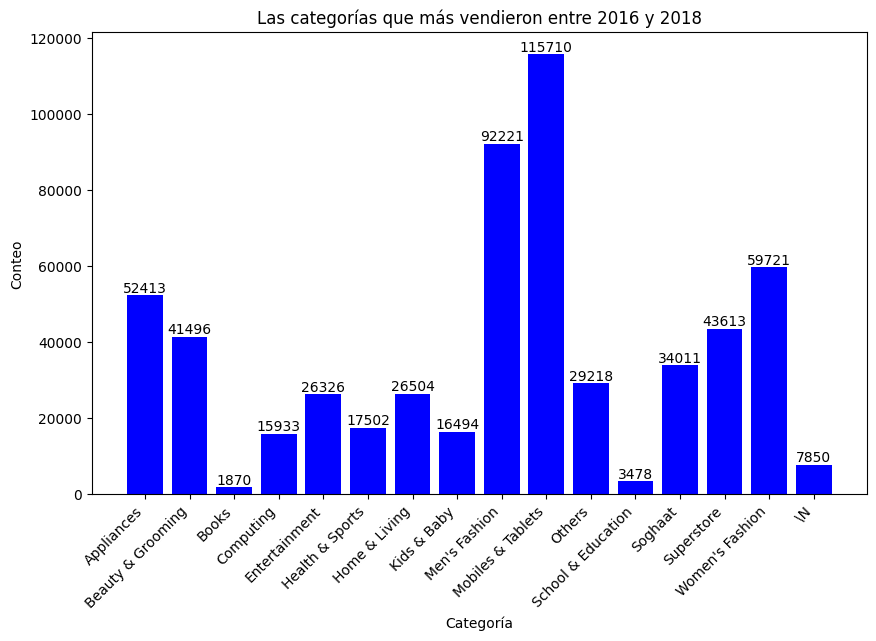

In [54]:
#Gráfico de barras con dimensiones 10 x 6
plt.figure(figsize=(10, 6))
catbar = plt.bar(category_counts.index, category_counts.values, color = 'blue')
plt.title('Las categorías que más vendieron entre 2016 y 2018')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')

#Declaramos una función que nos permite visualizar valores para cada categoría
def get_yval(graphs):
    for graph in graphs:
        y_values = graph.get_height()
        plt.text(graph.get_x() + graph.get_width()/2, y_values + 0.1, int(y_values), ha='center', va='bottom')

get_yval(catbar)

Veremos las tendencias de ventas en correspondencia con el mes de cada año

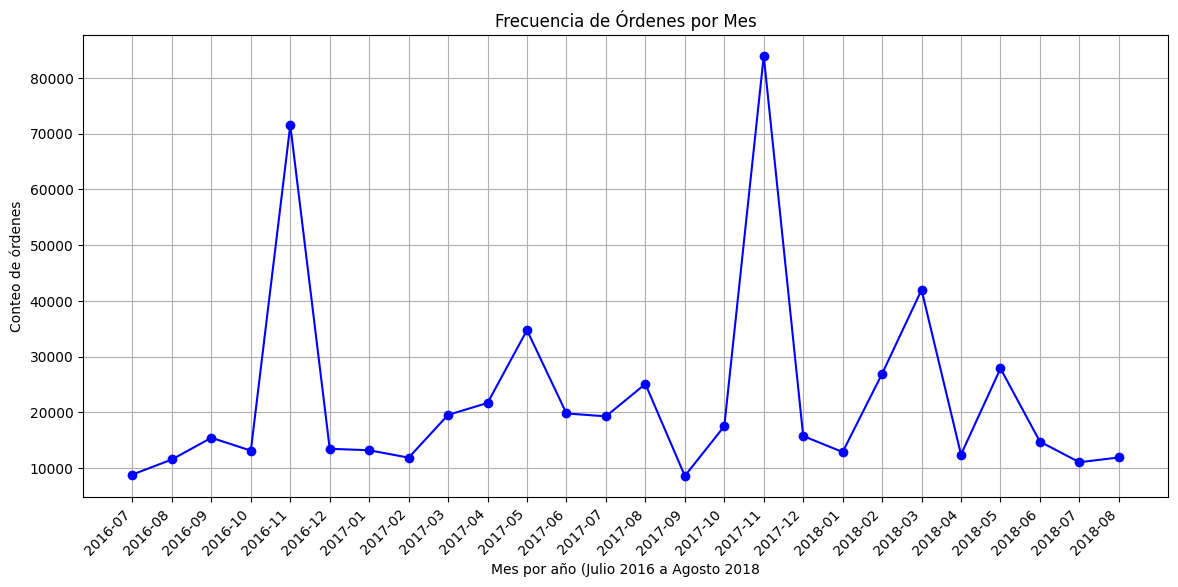

In [47]:
#Usaremos la fecha original "Working Date" convirtiendola a fecha
new_df['Working Date'] = pd.to_datetime(new_df['Working Date'])

#Extraemos el mes
new_df['Month'] = new_df['Working Date'].dt.to_period('M')

#Frecuencia de registros de órdenes
bymonth_orders = new_df.groupby('Month').size()

plt.figure(figsize=(14, 6))
plt.plot(bymonth_orders.index.astype(str), bymonth_orders.values, marker='o', linestyle='-', color='b')
plt.title('Frecuencia de Órdenes por Mes')
plt.xlabel('Mes por año (Julio 2016 a Agosto 2018')
plt.ylabel('Conteo de órdenes')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

In [49]:
#Para poder contabilizar métodos de pago por cada orden

payment_methods_count =new_df['payment_method'].value_counts().sort_index()
payment_methods_count.head()

payment_method
Easypay        82900
Easypay_MA     14028
Payaxis        97641
apg             1758
bankalfalah    23065
Name: count, dtype: int64

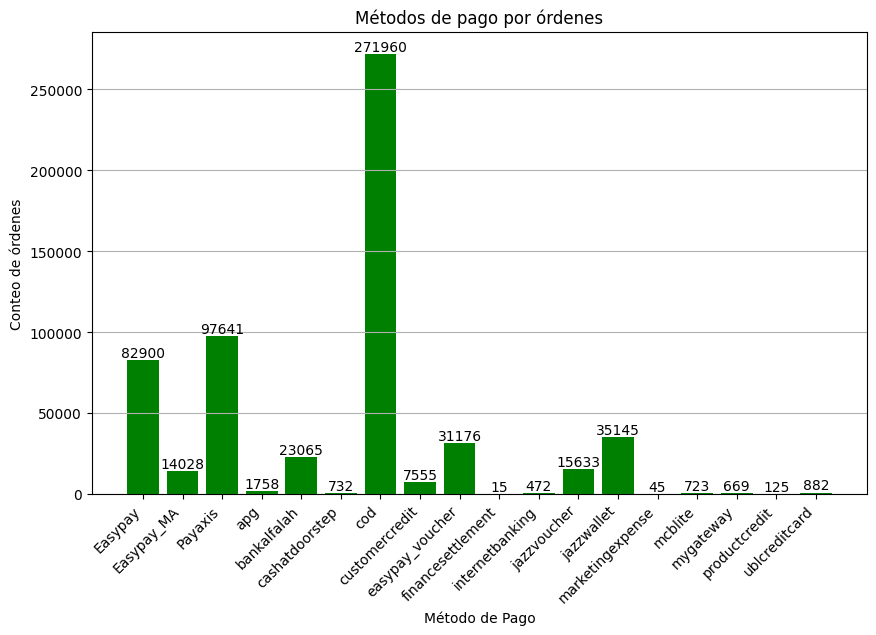

In [55]:
plt.figure(figsize=(10, 6))
payments_bar = plt.bar(payment_methods_count.index, payment_methods_count.values, color='green')
plt.title('Métodos de pago por órdenes')
plt.xlabel('Método de Pago')
plt.ylabel('Conteo de órdenes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

get_yval(payments_bar)